<div class="caja" style ="font-family: sans-serif;
    font-size: 13px;
    font-weight: 400;
	/*font-weight: bold;*/
    color: #fff;
    /*background: #889ccf;*/
    margin: 0 0 25px;
    overflow: hidden;
    padding: 20px;
    order: 10px solid #025280;
    background: #0F80C1;
    border-radius: 4px;
    border-left: 3px solid #025280;
    border-bottom: 2px solid #025280;
    border-right: 1px solid #025280;
    border-top: 0.5px solid #025280;
    height: 35px;
    padding: 10px;">UCSP- DIP en Machine Learning, Deep Learning y sus Aplicaciones en Industria | Course 2: Modelos de Regresión, Clasificación y Agrupamiento | Profesor: Pablo Calcina Cari |  Presentado: Hector Pérez V.</div>

## Caso de estudio ciberseguridad

In [73]:
from platform import python_version
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta
import math
import missingno as msno
import matplotlib
import scipy
#import warnings
#warnings.filterwarnings('ignore')

## Verificar versión de Librerias

In [74]:
print(f"Librerias instaladas:\n{'='*20}")
libraries = {'Python:':python_version(),'Pandas:':pd.__version__,
            'Numpy:':np.__version__,'Matplotlib:':matplotlib.__version__,
            'Seaborn:':sns.__version__,'Scipy:':scipy.__version__}
for i in libraries:
    print(f"- {i} {libraries[i]}")

Librerias instaladas:
- Python: 3.8.11
- Pandas: 1.3.2
- Numpy: 1.19.5
- Matplotlib: 3.4.2
- Seaborn: 0.11.2
- Scipy: 1.6.2


In [75]:
df_cyber = pd.read_csv("data/Cybersecurity_attacks.csv")
df_cyber.head(4)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417


In [76]:
df_cyber.columns

Index(['Attack category', 'Attack subcategory', 'Protocol', 'Source IP',
       'Source Port', 'Destination IP', 'Destination Port', 'Attack Name',
       'Attack Reference', '.', 'Time'],
      dtype='object')

In [77]:
df_cyber[['Start time','Last time']] = df_cyber['Time'].str.split('-',expand=True)
df_cyber.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time,Start time,Last time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418,1421927418,1421927418


In [78]:
df_cyber.columns

Index(['Attack category', 'Attack subcategory', 'Protocol', 'Source IP',
       'Source Port', 'Destination IP', 'Destination Port', 'Attack Name',
       'Attack Reference', '.', 'Time', 'Start time', 'Last time'],
      dtype='object')

In [79]:
df_cyber['.'].unique()

array(['.'], dtype=object)

In [80]:
df_cyber = df_cyber.drop(['.', 'Time'],axis=1)# Drop columns and make a copy in memory of the object
df_cyber.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418


In [81]:
print(f'Dimension:\n{"="*10}\n{df_cyber.shape}')

Dimension:
(178031, 11)


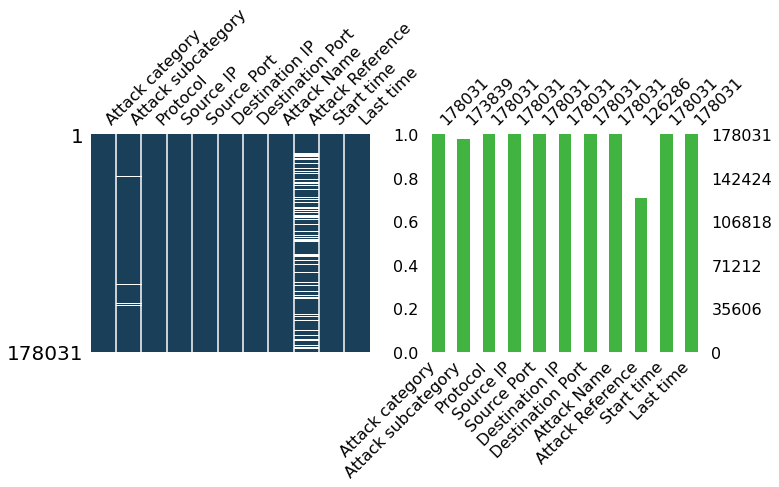

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
msno.matrix(df_cyber, ax=ax1, sparkline=False, color=(0.1, 0.25, 0.35))
msno.bar(df_cyber, ax=ax2, color=(0.25, 0.7, 0.25))
plt.show()

In [83]:
# numero de Valores faltantes
#number of missing values
df_cyber.isnull().sum()

Attack category           0
Attack subcategory     4192
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start time                0
Last time                 0
dtype: int64

In [84]:
#filling the missing values
df_cyber["Attack subcategory"] = df_cyber["Attack subcategory"].fillna("Not Registered")

In [85]:
df_cyber.isnull().sum()

Attack category           0
Attack subcategory        0
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start time                0
Last time                 0
dtype: int64

In [86]:
df_cyber[df_cyber.duplicated()]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
32881,Exploits,Browser,ospf,175.45.176.1,0,149.171.126.16,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424223999,1424224029
40645,Exploits,Browser,ospf,175.45.176.3,0,149.171.126.13,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424227562,1424227593
61710,Exploits,Browser,ospf,175.45.176.3,0,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424231161,1424231205
115911,Exploits,Browser,sctp,175.45.176.3,0,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424246344,1424246344
122923,Exploits,Browser,sep,175.45.176.3,0,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424249567,1424249567
148693,Exploits,Browser,sctp,175.45.176.3,0,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424256448,1424256450


In [87]:
print('Dimensión Antes de borrar filas duplicadas: ' + str(df_cyber.shape))
df_cyber = df_cyber.drop(df_cyber[df_cyber.duplicated()].index)
print('Dimensión despues de borrar Filas duplicated: ' + str(df_cyber.shape))

Dimensión Antes de borrar filas duplicadas: (178031, 11)
Dimensión despues de borrar Filas duplicated: (178025, 11)


In [88]:
df_cyber[df_cyber.duplicated()]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time


In [89]:
mask1 = (df_cyber['Source Port'] < 0) | (df_cyber['Source Port'] > 65535)
mask2 = (df_cyber['Destination Port'] < 0) | (df_cyber['Destination Port'] > 65535)
df_cyber[mask1 | mask2]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
174347,Generic,IXIA,udp,175.45.176.1,67520,149.171.126.18,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2005-4092 (http://cve.mitre.org/cgi-bin/cv...,1421933561,1421933561
174348,Exploits,Browser,tcp,175.45.176.3,78573,149.171.126.18,110,Microsoft Internet Explorer 6.0 Png pngfilt.dl...,BPS 2010-0002 (https://strikecenter.bpointsys....,1421932490,1421932491
174349,Reconnaissance,HTTP,tcp,175.45.176.1,71804,149.171.126.10,80,Domino Web Server Database Access: /internet.n...,NaN,1424236143,1424236143
174350,DoS,Ethernet,pnni,175.45.176.3,0,149.171.126.19,-753,Cisco IPS Jumbo Frame System Crash (https://st...,CVE 2008-2060 (http://cve.mitre.org/cgi-bin/cv...,1424230284,1424230284
174351,Fuzzers,OSPF,trunk-1,175.45.176.0,73338,149.171.126.13,0,Fuzzer: OSPF Hello Packet: Long Neighbor Lists...,NaN,1424223172,1424223172
...,...,...,...,...,...,...,...,...,...,...,...
178026,Generic,IXIA,udp,175.45.176.0,72349,149.171.126.12,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,1424224338,1424224338
178027,Exploits,Browser,sep,175.45.176.3,67647,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424249567,1424249567
178028,Exploits,Office Document,tcp,175.45.176.0,78359,149.171.126.13,110,Microsoft Excel SxView Memory Corruption (POP3...,CVE 2009-3128 (http://cve.mitre.org/cgi-bin/cv...,1424219921,1424219923
178029,Exploits,Browser,tcp,175.45.176.2,68488,149.171.126.19,80,Internet Explorer createTextRange() Code Execu...,CVE 2006-1359 (http://cve.mitre.org/cgi-bin/cv...,1424247789,1424247789


In [90]:
df_cyber = df_cyber[~(mask1 | mask2)].reset_index(drop=True)

In [91]:
separator = '='*50
print(f"Número total de protocolos diferentes:\n{separator}\n{len(df_cyber['Protocol'].unique())}")
print(f"Número total de diferentes categorías de ataques:\n{separator}\n{len(df_cyber['Attack category'].unique())}")
df_cyber['Protocol'].unique()[:10]

Número total de protocolos diferentes:
131
Número total de diferentes categorías de ataques:
14


array(['tcp', 'udp', 'Tcp', 'UDP', 'ospf', 'sctp', 'sep', 'mobile',
       'sun-nd', 'swipe'], dtype=object)

In [92]:
df_cyber['Protocol'] = df_cyber['Protocol'].str.upper().str.strip()
df_cyber['Attack category'] = df_cyber['Attack category'].str.upper().str.strip()
df_cyber['Attack category'] = df_cyber['Attack category'].str.strip().replace('BACKDOORS','BACKDOOR')
df_interest = df_cyber.copy()
df_interest.head(5)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418


In [93]:
print('Total number of different protocols:', len(df_cyber['Protocol'].unique()))
print('Total number of different Attack categories:', len(df_cyber['Attack category'].unique()))

Total number of different protocols: 129
Total number of different Attack categories: 9


In [94]:
# Percentage of missing values in 'Attack Reference' per Attack Category
((df_cyber[pd.isnull(df_cyber['Attack Reference'])]['Attack category'].value_counts()/
df_cyber['Attack category'].value_counts())*100).dropna().sort_values(ascending=False)

RECONNAISSANCE    90.132102
FUZZERS           88.141388
ANALYSIS          85.964912
SHELLCODE         49.437459
WORMS              6.508876
GENERIC            1.717019
BACKDOOR           1.516196
DOS                0.215605
EXPLOITS           0.007330
Name: Attack category, dtype: float64

In [95]:
df_tcp_ports = pd.read_csv('data/TCP-ports.csv')
df_tcp_ports['Service'] = df_tcp_ports['Service'].str.upper()
df_tcp_ports.head(10)

,Port,Service,Description
0,0,NaN,Reserved
1,1,TCPMUX,TCP Port Service Multiplexer
2,2,COMPRESSNET,Management Utility
3,3,COMPRESSNET,Compression Process
4,5,RJE,Remote Job Entry
5,7,ECHO,Echo
6,9,DISCARD,Discard
7,11,SYSTAT,Active Users
8,13,DAYTIME,Daytime
9,15,NaN,Unassigned [was netstat]


In [96]:
print('Dimensions before merging dataframes: ' + str(df_interest.shape))

df_interest = pd.merge(df_interest, df_tcp_ports[['Port','Service']], left_on='Destination Port', right_on='Port', how='left')
df_interest = df_interest.rename(columns={'Service':'Destination Port Service'})

print('Dimensions after merging dataframes: ' + str(df_interest.shape))

Dimensions before merging dataframes: (174341, 11)
Dimensions after merging dataframes: (174341, 13)


In [97]:
df_interest = df_interest.drop(columns=['Port'])
df_interest.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time,Destination Port Service
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416,HTTP
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415,NaN
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416,HTTP
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417,PERSONAL-AGENT
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418,HTTP


In [98]:
df_interest['Attack category'].unique()

array(['RECONNAISSANCE', 'EXPLOITS', 'DOS', 'GENERIC', 'SHELLCODE',
       'FUZZERS', 'WORMS', 'BACKDOOR', 'ANALYSIS'], dtype=object)

In [99]:

df_interest['Attack category'].value_counts()

EXPLOITS          68211
FUZZERS           33638
DOS               24582
RECONNAISSANCE    20136
GENERIC           19860
BACKDOOR           4353
ANALYSIS           1881
SHELLCODE          1511
WORMS               169
Name: Attack category, dtype: int64

In [100]:
df_interest['Attack category'].value_counts()*100/df_interest['Attack category'].value_counts().sum()

EXPLOITS          39.125048
FUZZERS           19.294371
DOS               14.099954
RECONNAISSANCE    11.549779
GENERIC           11.391468
BACKDOOR           2.496831
ANALYSIS           1.078920
SHELLCODE          0.866692
WORMS              0.096936
Name: Attack category, dtype: float64

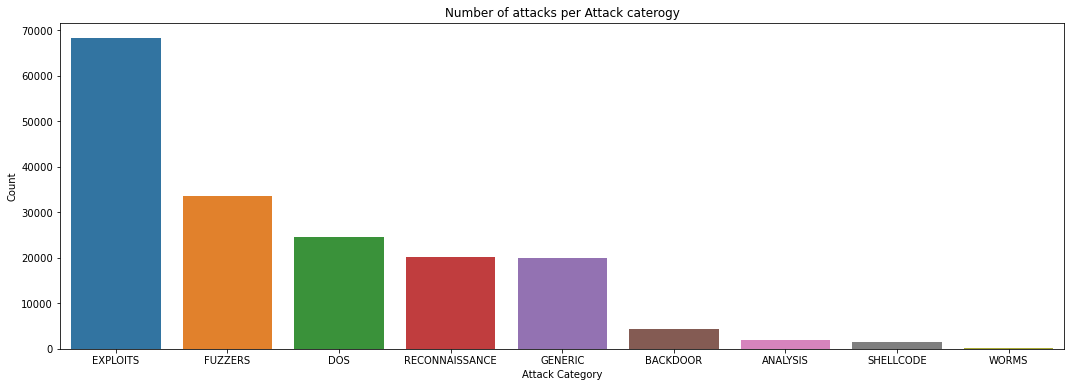

In [101]:
plt.figure(figsize=(18,6))
sns.barplot(x=df_interest['Attack category'].value_counts().index,y=df_interest['Attack category'].value_counts())
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.title('Number of attacks per Attack caterogy')
#plt.grid(True)
plt.show()

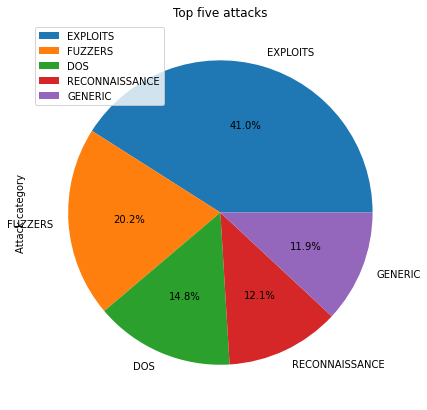

In [102]:
pd.DataFrame(df_interest['Attack category'].value_counts())[:5].plot(kind='pie', y='Attack category', figsize=(7, 7), autopct='%1.1f%%')
plt.title('Top five attacks')
plt.legend(loc='upper left')
plt.show()

In [103]:
a=pd.DataFrame(df_cyber['Attack category'].value_counts())

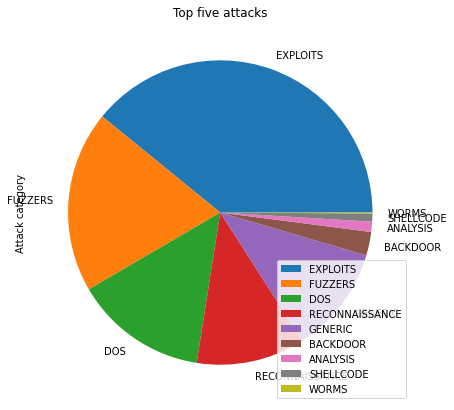

In [104]:
a.plot(kind='pie', subplots=True, figsize=(7, 7))
plt.title('Top five attacks')
plt.legend(loc=4)
plt.show()

In [105]:
df_interest['Start time'] = pd.to_datetime(df_interest['Start time'], unit='s')
df_interest['Last time'] = pd.to_datetime(df_interest['Last time'], unit='s')
df_interest['Duration'] = ((df_interest['Last time'] - df_interest['Start time']).dt.seconds).astype(int)

In [106]:
#arranging the time columns into specific format and calculating the duration 
df_cyber['Start time'] = pd.to_datetime(df_cyber['Start time'], unit='s')
df_cyber['Last time'] = pd.to_datetime(df_cyber['Last time'], unit='s')
df_cyber['Duration'] = ((df_cyber['Last time'] - df_cyber['Start time']).dt.seconds).astype(int)

In [107]:
df_cyber['Start time'].astype(str).str.split(' ').str[0].unique()

array(['2015-01-22', '2015-02-18'], dtype=object)

array([[<AxesSubplot:title={'center':'Source Port'}>,
        <AxesSubplot:title={'center':'Destination Port'}>],
       [<AxesSubplot:title={'center':'Start time'}>,
        <AxesSubplot:title={'center':'Last time'}>],
       [<AxesSubplot:title={'center':'Duration'}>, <AxesSubplot:>]],
      dtype=object)

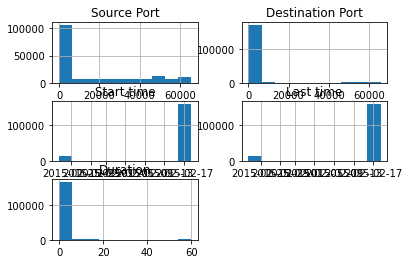

In [108]:
df_cyber.hist()


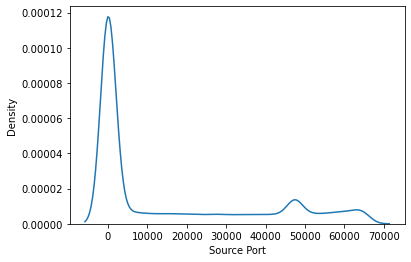

In [109]:
sns.kdeplot(df_cyber['Source Port']);

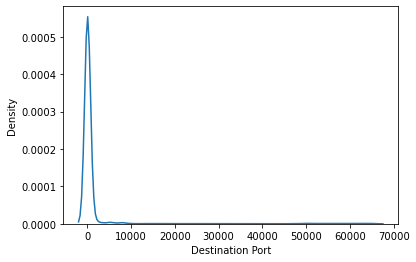

In [110]:
sns.kdeplot(df_cyber['Destination Port']);

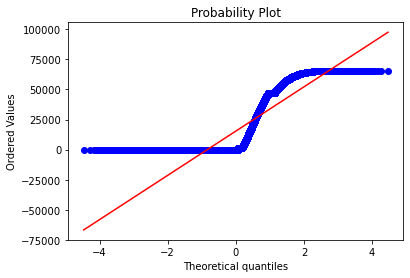

In [111]:
import scipy.stats as stats
import pylab
stats.probplot(df_cyber['Source Port'],plot=pylab);

In [112]:
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

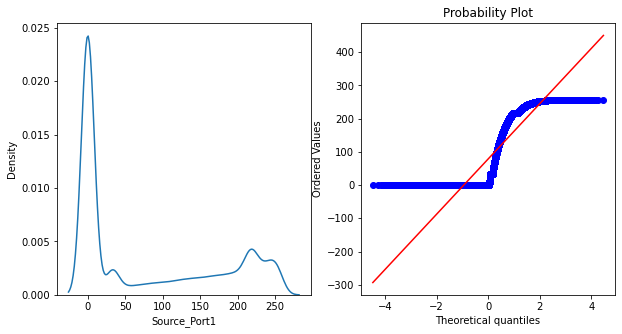

In [41]:
df_cyber['Source_Port1']=np.sqrt(df_cyber['Source Port'])
normality(df_cyber, 'Source_Port1')

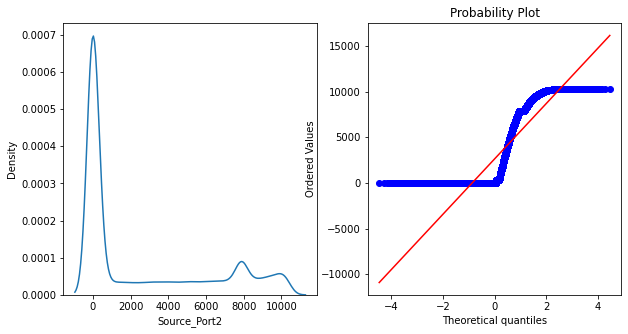

In [42]:
df_cyber['Source_Port2'] = df_cyber['Source Port']**(1/1.2)
normality(df_cyber, 'Source_Port2')

In [43]:
df_cyber.corr()

,Source Port,Destination Port,Duration,Source_Port1,Source_Port2
Source Port,1.000000,0.137155,-0.078024,0.974079,0.998015
Destination Port,0.137155,1.000000,-0.026770,0.162383,0.144288
Duration,-0.078024,-0.026770,1.000000,-0.089677,-0.081416
Source_Port1,0.974079,0.162383,-0.089677,1.000000,0.986129
Source_Port2,0.998015,0.144288,-0.081416,0.986129,1.000000


In [44]:
import statistics
meanvalue = statistics.mean(df_cyber['Source Port'])
output = statistics.variance(df_cyber['Source Port'], meanvalue)
print(meanvalue)
print(output)

15391.13038241148
471229622.79551035


In [45]:
meanvalue1 = statistics.mean(df_cyber['Destination Port'])
output1 = statistics.variance(df_cyber['Destination Port'], meanvalue1)
print(meanvalue1)
print(output1)

1304.5994229699268
55741687.68283757


In [46]:
stats.ttest_ind(df_cyber['Source Port'], df_cyber['Destination Port'], equal_var=False)

Ttest_indResult(statistic=256.2184116134323, pvalue=0.0)

In [47]:
df_cyber.describe()

,Source Port,Destination Port,Duration,Source_Port1,Source_Port2
count,174341.000000,174341.000000,174341.000000,174341.000000,174341.000000
mean,15391.130382,1304.599423,2.341572,78.608978,2621.752348
std,21707.824000,7466.035607,9.309381,95.978184,3546.210793
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31862.000000,80.000000,1.000000,178.499300,5658.841473
max,65535.000000,65535.000000,60.000000,255.998047,10321.141999


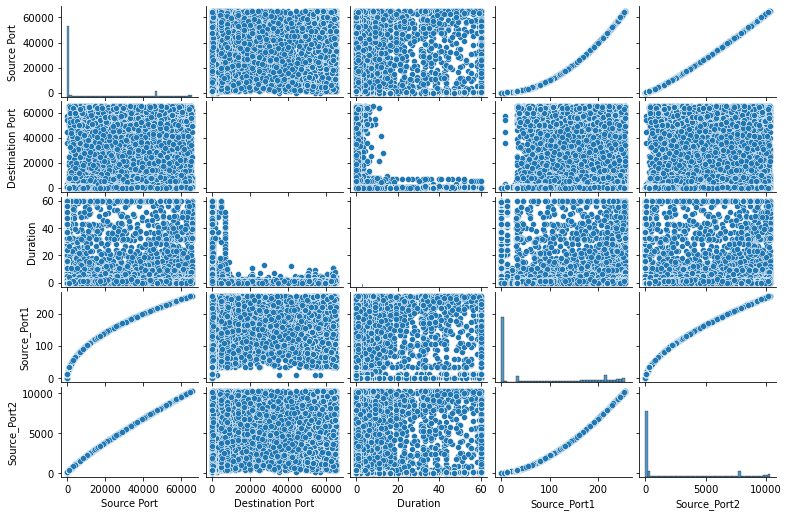

In [48]:
#comparing different features
g = sns.pairplot(df_cyber)
g.fig.set_size_inches(11,7)
plt.show()

In [49]:
#target IPs
df_cyber['Destination IP'].value_counts()

149.171.126.17    43199
149.171.126.10    24002
149.171.126.19    21619
149.171.126.13    20464
149.171.126.18    13301
149.171.126.14    12195
149.171.126.12    11970
149.171.126.15    10555
149.171.126.11     9444
149.171.126.16     7592
Name: Destination IP, dtype: int64

In [50]:
df_interest['Start time'].astype(str).str.split(' ').str[0].unique()

array(['2015-01-22', '2015-02-18'], dtype=object)

In [51]:
df_interest.describe().T

,count,mean,std,min,25%,50%,75%,max
Source Port,174341.0,15391.130382,21707.824000,0.0,0.0,0.0,31862.0,65535.0
Destination Port,174341.0,1304.599423,7466.035607,0.0,0.0,0.0,80.0,65535.0
Duration,174341.0,2.341572,9.309381,0.0,0.0,0.0,1.0,60.0


In [52]:
df_interest.corr(method='pearson')

,Source Port,Destination Port,Duration
Source Port,1.000000,0.137155,-0.078024
Destination Port,0.137155,1.000000,-0.026770
Duration,-0.078024,-0.026770,1.000000


In [53]:
df_interest.corr(method='pearson')

,Source Port,Destination Port,Duration
Source Port,1.000000,0.137155,-0.078024
Destination Port,0.137155,1.000000,-0.026770
Duration,-0.078024,-0.026770,1.000000


In [54]:
df_dummies = pd.get_dummies(df_interest, columns=['Attack category'])
df_dummies

,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time,...,Duration,Attack category_ANALYSIS,Attack category_BACKDOOR,Attack category_DOS,Attack category_EXPLOITS,Attack category_FUZZERS,Attack category_GENERIC,Attack category_RECONNAISSANCE,Attack category_SHELLCODE,Attack category_WORMS
0,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,2015-01-22 11:50:14,2015-01-22 11:50:16,...,2,0,0,0,0,0,0,1,0,0
1,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:15,2015-01-22 11:50:15,...,0,0,0,0,1,0,0,0,0,0
2,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:16,2015-01-22 11:50:16,...,0,0,0,0,1,0,0,0,0,0
3,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:17,2015-01-22 11:50:17,...,0,0,0,0,1,0,0,0,0,0
4,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:18,2015-01-22 11:50:18,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174336,IGMP,TCP,175.45.176.0,33654,149.171.126.12,80,Microsoft IIS Repeated Parameter Request Denia...,CVE 2010-1899 (http://cve.mitre.org/cgi-bin/cv...,2015-02-18 12:21:06,2015-02-18 12:21:09,...,3,0,0,1,0,0,0,0,0,0
174337,SMB,TCP,175.45.176.3,36468,149.171.126.15,445,Fuzzer: SMB Session Setup Invalid Username (NT...,NaN,2015-02-18 12:21:07,2015-02-18 12:21:08,...,1,0,0,0,0,1,0,0,0,0
174338,SunRPC Portmapper (TCP) UDP Service,TCP,175.45.176.2,64395,149.171.126.18,111,SunRPC TCP Portmapper GETPORT Request (ippathv...,NaN,2015-02-18 12:21:07,2015-02-18 12:21:08,...,1,0,0,0,0,0,0,1,0,0
174339,IXIA,UDP,175.45.176.0,47439,149.171.126.10,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,2015-02-18 12:21:08,2015-02-18 12:21:08,...,0,0,0,0,0,0,1,0,0,0


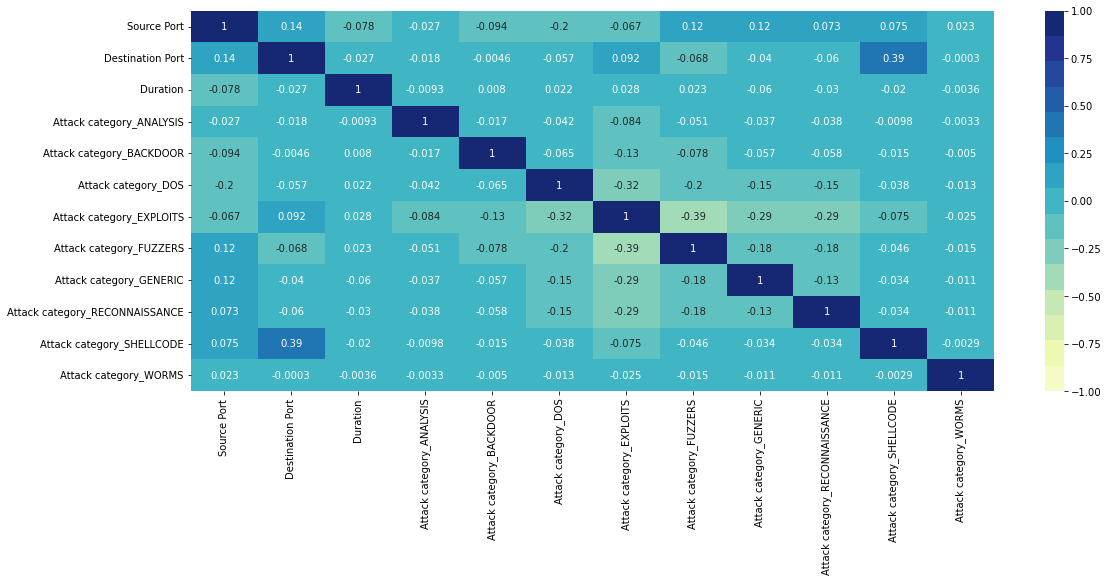

In [55]:
plt.figure(figsize=(18,7))
sns.heatmap(df_dummies.corr(method='pearson'), 
            annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("YlGnBu", 15))
plt.show()

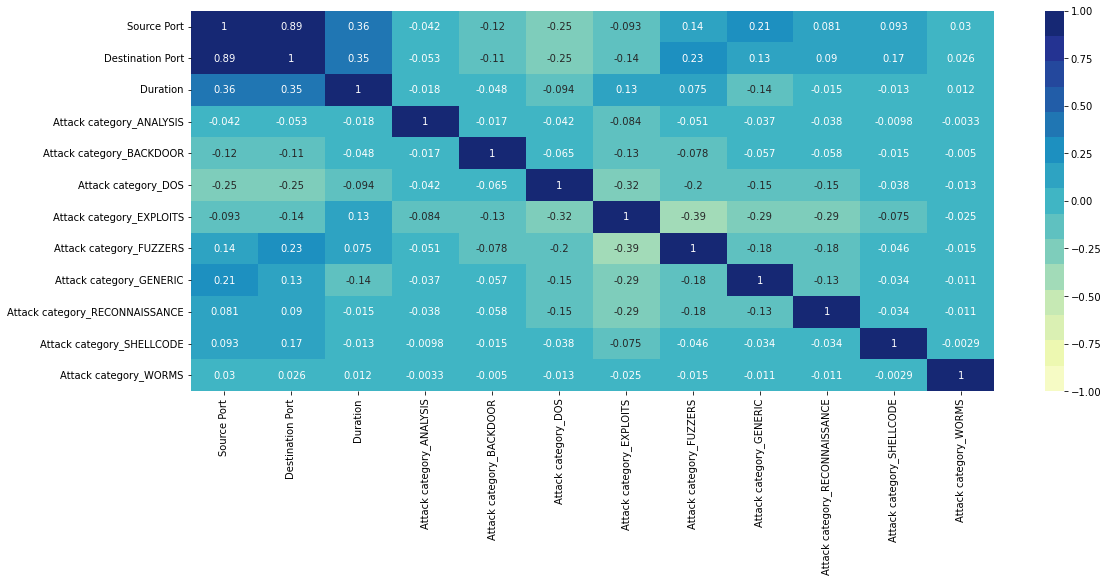

In [56]:
plt.figure(figsize=(18,7))
sns.heatmap(df_dummies.corr(method='spearman'), 
            annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("YlGnBu", 15))
plt.show()

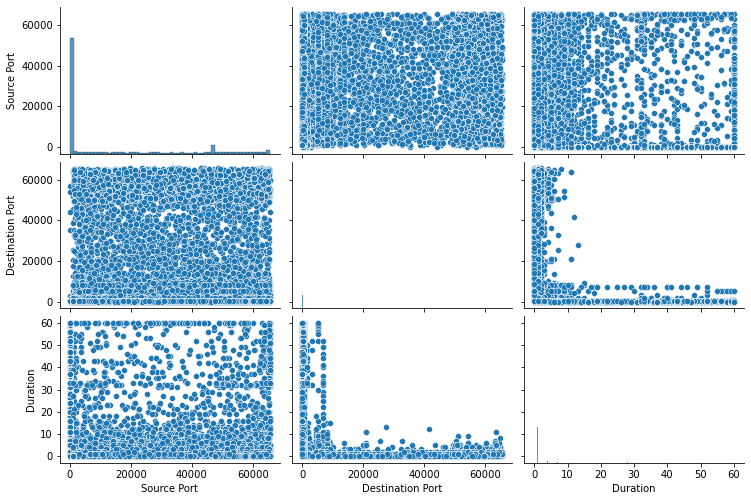

In [57]:
g = sns.pairplot(df_interest)
g.fig.set_size_inches(11,7)
plt.show()

In [58]:
df_interest['Destination IP'].value_counts()[:5]

149.171.126.17    43199
149.171.126.10    24002
149.171.126.19    21619
149.171.126.13    20464
149.171.126.18    13301
Name: Destination IP, dtype: int64

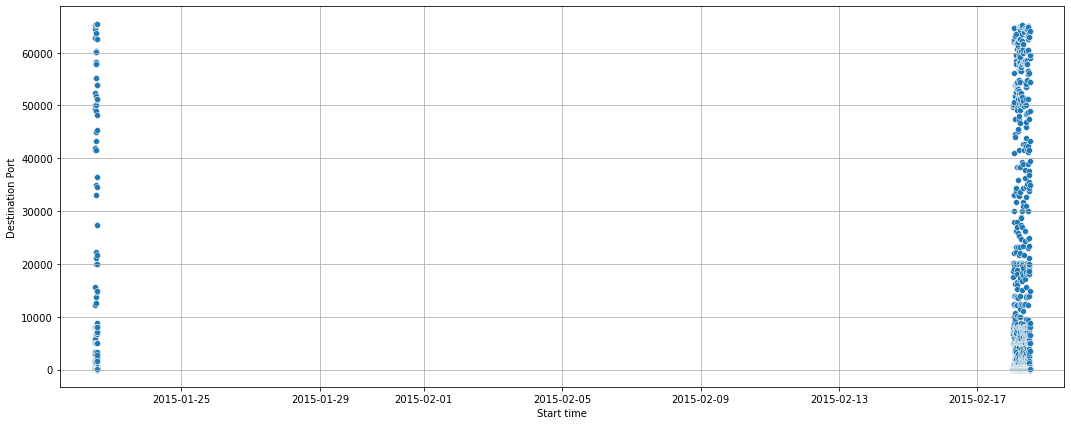

In [59]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=df_interest[df_interest['Destination IP']=='149.171.126.17']['Start time'], y=df_interest[df_interest['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=df_interest['Start time'].min()-timedelta(days=1),right=df_interest['Start time'].max()+timedelta(days=1))
plt.grid(True)
plt.show()

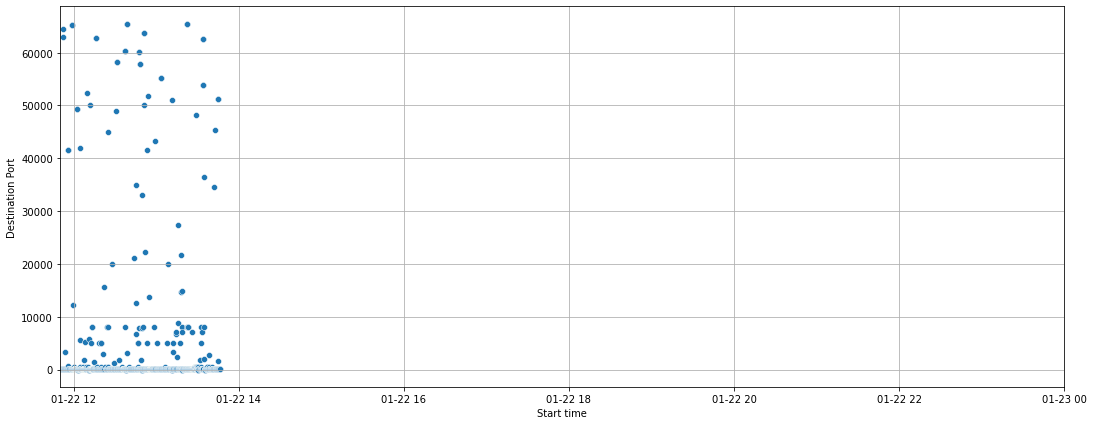

In [60]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=df_interest[df_interest['Destination IP']=='149.171.126.17']['Start time'], y=df_interest[df_interest['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=df_interest['Start time'].min(),right=datetime.strptime('15-01-23', '%y-%m-%d'))
plt.grid(True)
plt.show()

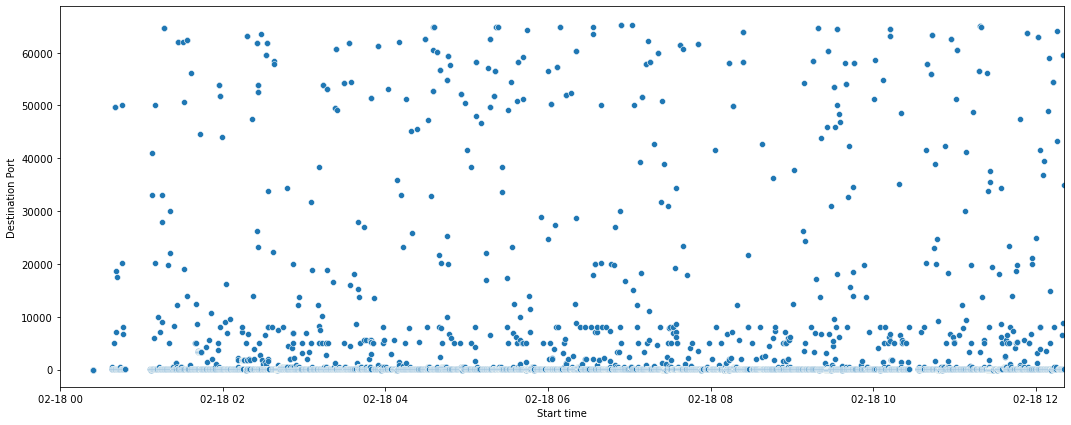

In [61]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=df_interest[df_interest['Destination IP']=='149.171.126.17']['Start time'], y=df_interest[df_interest['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=datetime.strptime('15-02-18', '%y-%m-%d'),right=df_interest['Start time'].max())
#plt.grid(True)
plt.show()

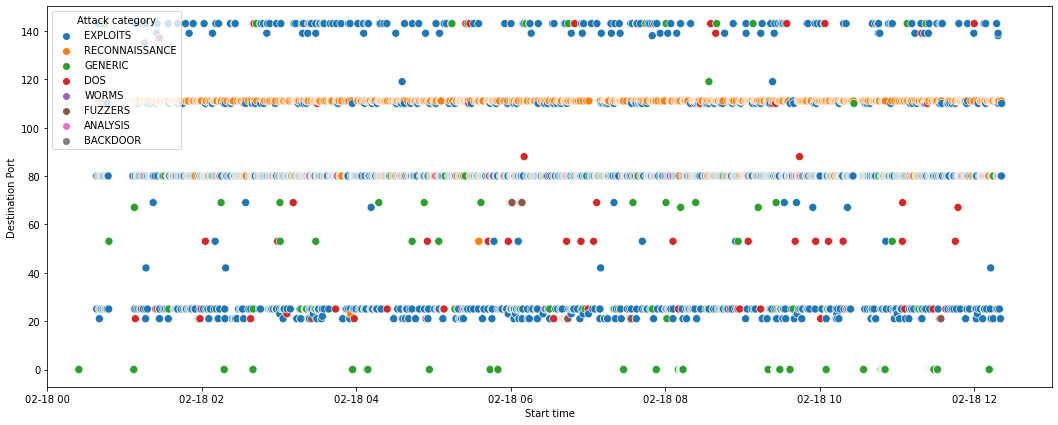

In [62]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Start time', y='Destination Port', hue='Attack category', 
                data=df_interest[(df_interest['Destination IP']=='149.171.126.17')&(df_interest['Destination Port']<=150)], 
                s=65)
plt.xlim(left=datetime.strptime('15-02-18 00:00:00', '%y-%m-%d %H:%M:%S'),
         right=datetime.strptime('15-02-18 13:00:00', '%y-%m-%d %H:%M:%S'))
#plt.grid(True)
plt.show()

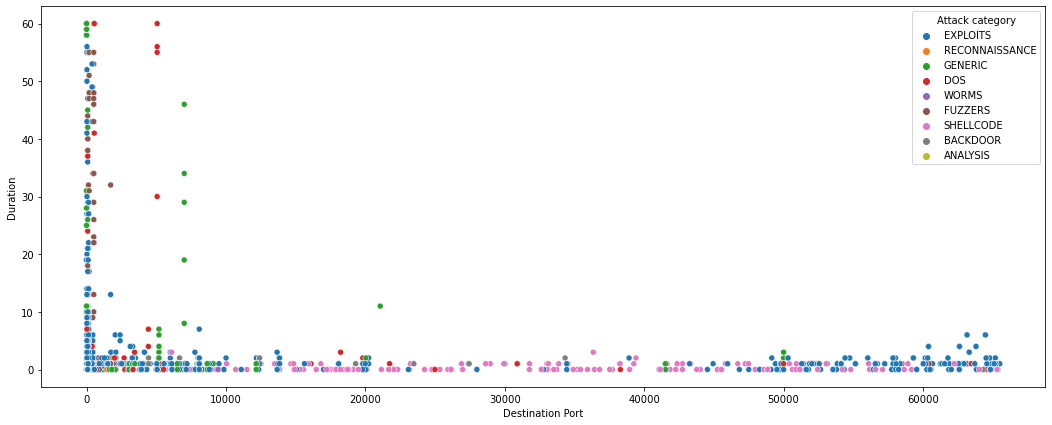

In [63]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Destination Port', y='Duration', hue='Attack category', data=df_interest[df_interest['Destination IP']=='149.171.126.17'])
#plt.grid(True)
plt.show()

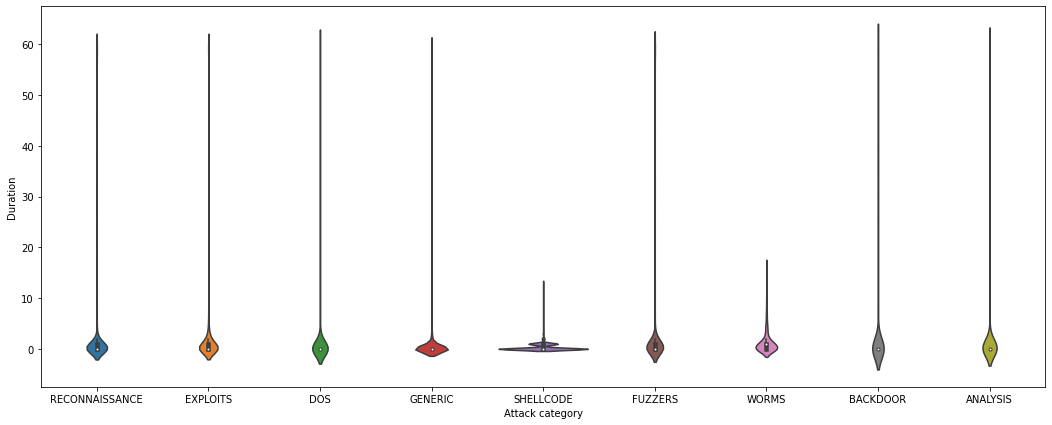

In [64]:
plt.figure(figsize=(18,7))
sns.violinplot(x='Attack category', y='Duration', data=df_interest, showfliers = False)
#plt.grid(True)
plt.show()

In [65]:
df_interest_pivot = df_interest.copy()
df_interest_pivot['hour'] = df_interest_pivot.apply(lambda row: '0'*(2-len(str(row['Start time'].hour)))+str(row['Start time'].hour)+':00:00', axis=1)

In [66]:
from functions.graph import heatmap_grafica

In [67]:
df_p1 = pd.pivot_table(df_interest_pivot, 
                           values='Attack Name', 
                           index=['hour'], columns=['Attack category'], aggfunc='count')
df_p1

Attack category,ANALYSIS,BACKDOOR,DOS,EXPLOITS,FUZZERS,GENERIC,RECONNAISSANCE,SHELLCODE,WORMS
hour,,,,,,,,,
00:00:00,3,16,127,543,391,60,177,20,3
01:00:00,186,1148,2640,6716,4477,1748,1804,105,14
02:00:00,71,100,630,2861,1983,1031,1023,113,10
03:00:00,226,60,3755,9759,2743,1513,2727,113,17
04:00:00,64,87,617,2776,2090,1349,1034,115,10
05:00:00,198,645,3038,9368,2536,1834,1750,111,15
06:00:00,84,90,637,2968,2065,994,1010,116,9
07:00:00,179,578,3390,6151,2413,2076,1846,116,15
08:00:00,73,111,664,2938,2048,1081,1010,107,11


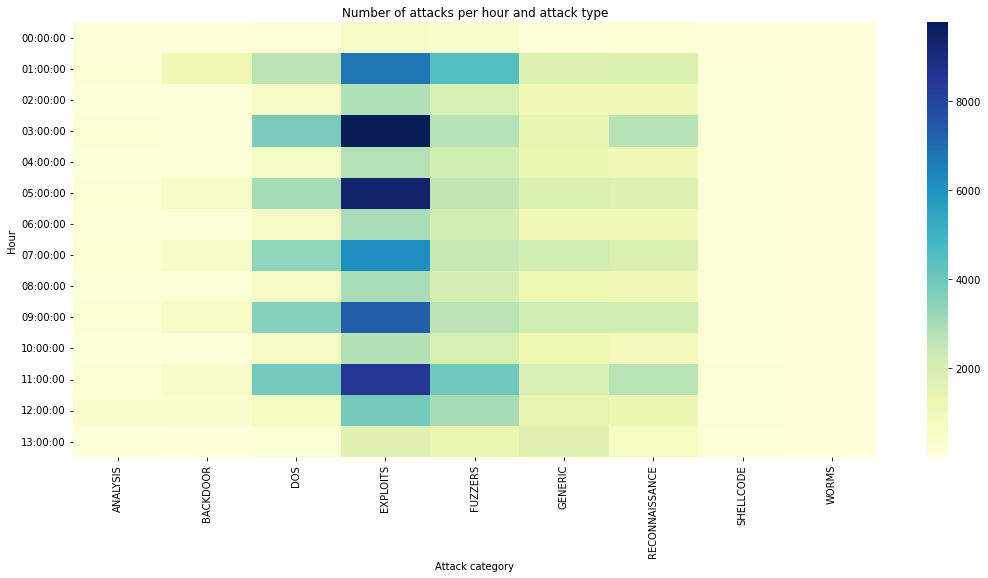

In [68]:
heatmap_grafica(df = df_p1, 
                xlabel = 'Attack category',
                ylabel = 'Hour', 
                title = 'Number of attacks per hour and attack type')

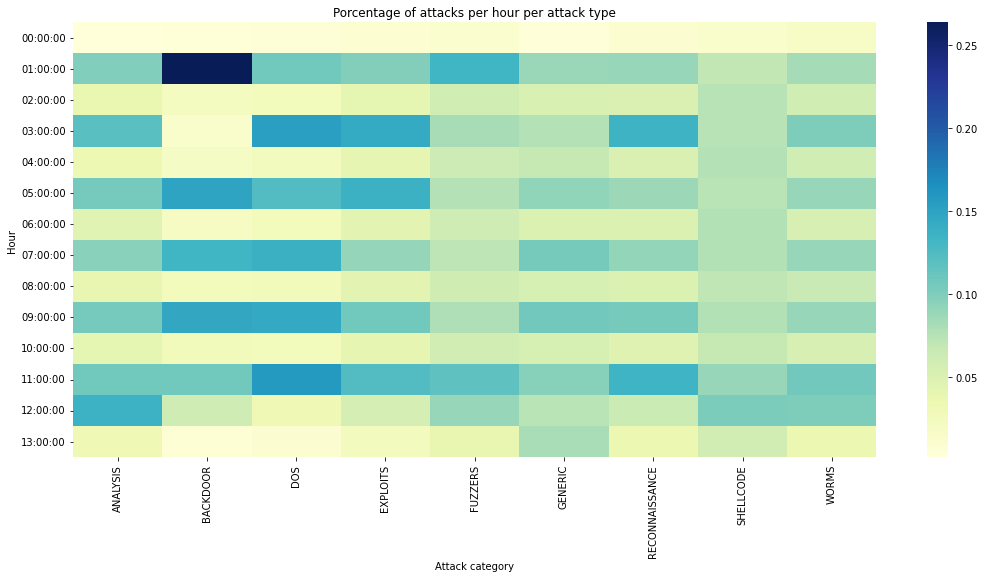

In [69]:

heatmap_grafica(df = df_p1/df_p1.sum(), 
                xlabel = 'Attack category', 
                ylabel = 'Hour', 
                title = 'Porcentage of attacks per hour per attack type')

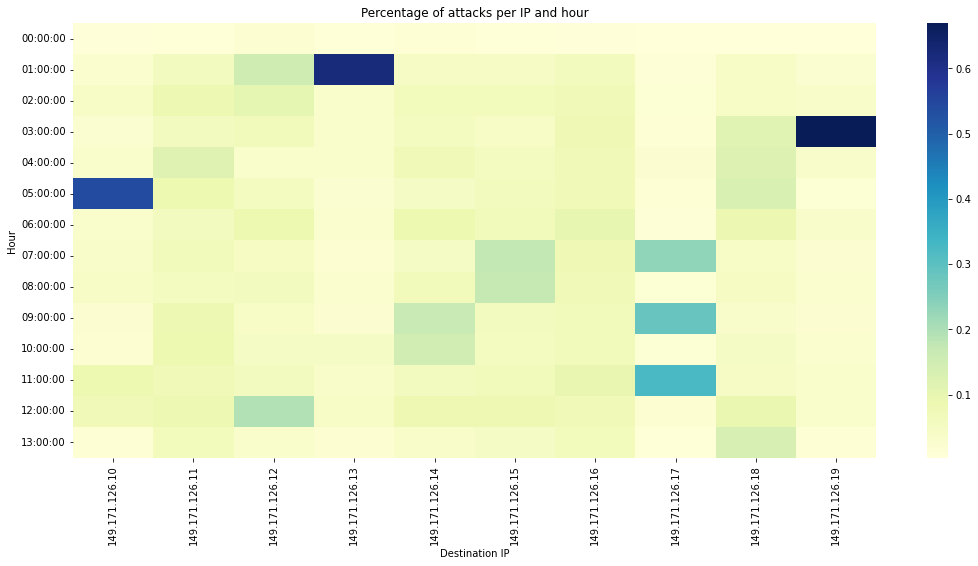

In [70]:
df_p2 = pd.pivot_table(df_interest_pivot, 
                        values='Attack Name', 
                        index=['hour'], columns=['Destination IP'], aggfunc='count')

heatmap_grafica(df = df_p2/df_p2.sum(), 
            xlabel = 'Destination IP', 
            ylabel = 'Hour', 
            title = 'Percentage of attacks per IP and hour')

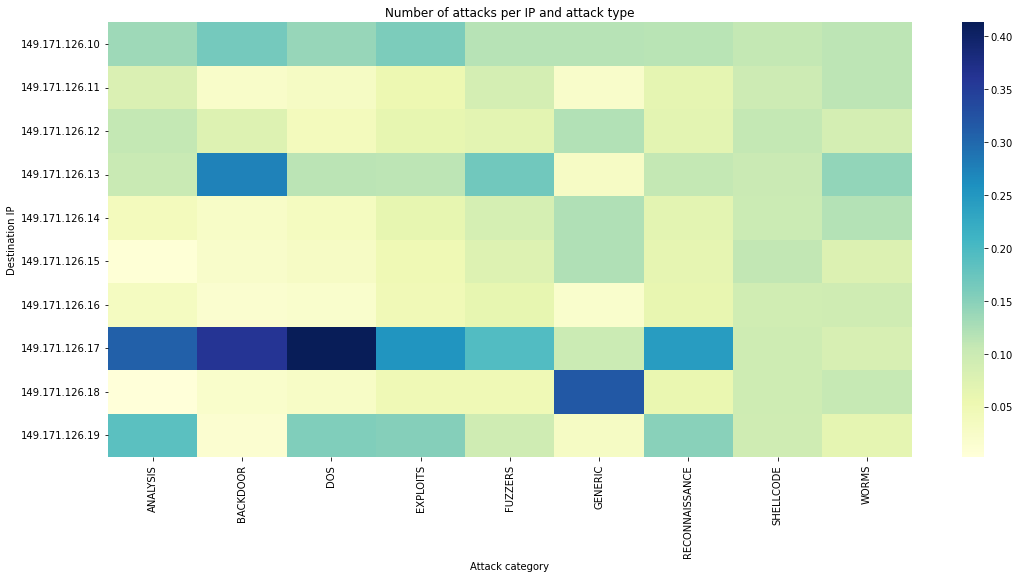

In [71]:
df_p3 = pd.pivot_table(df_interest_pivot, 
                        values='Attack Name', 
                        index=['Destination IP'],
                        columns=['Attack category'],
                        aggfunc='count')
heatmap_grafica(df = df_p3/df_p3.sum(), 
            xlabel = 'Attack category', 
            ylabel = 'Destination IP', 
            title = 'Number of attacks per IP and attack type')

## Análisis detallado de puertos lógicos

Analizar el comportamiento de los puertos lógicos de origen y destino durante los ataques de ciberseguridad.

In [72]:
df_interest.describe().T

,count,mean,std,min,25%,50%,75%,max
Source Port,174341.0,15391.130382,21707.824000,0.0,0.0,0.0,31862.0,65535.0
Destination Port,174341.0,1304.599423,7466.035607,0.0,0.0,0.0,80.0,65535.0
Duration,174341.0,2.341572,9.309381,0.0,0.0,0.0,1.0,60.0


Diferencia en la media de los puertos de origen (15391) y los puertos de destino (1304) en los ataques de ciberseguridad.

Para identificar si esta diferencia es estadísticamente significativa, vamos verificar estadísticamente con un nivel de significancia, realizaremos una Prueba de Hipótesis sobre la diferencia en los promedios de los puertos de origen y destino.

Si la media de los puertos de origen de los ataques de ciberseguridad  ($\mu_1$) es diferente de la media de los puertos de destino ($\mu_2$)

El procedimiento de prueba tiene dos de hipótesis $ H_0 $ y $ H_a $:

$$ H_0: \mu_1=\mu_2$$
$$ H_a: \mu_1\neq\mu_2$$

$ H_0 $ la hipótesis nula: las medias de los puertos de origen y destino son iguales.
$ H_a $ la hipótesis alternativa: las medias de los puertos de origen y destino son diferentes.



## Conclusiones 

En este caso de uso, hemos aprendido a:
- Trabajar con el paquete pandas de Python, extrayendo datos útiles que pueden dar una orientación para un mayor análisis de ciberseguridad.
- Trace los datos en varios gráficos utilizando el paquete `seaborn`.
- Interpretar los resultados numéricos y gráficos.
- Ejecutar pruebas de hipótesis para validar diferencias estadísticamente significativas entre medias de múltiples variables.

Una vez graficados y analizados los datos, pudimos identificar el patrón de varios tipos de ataques de ciberseguridad, relacionando su comportamiento en el tiempo, en la duración y en la distribución de los puertos de origen y destino. El procedimiento que se explica aquí se puede extrapolar para todo tipo de estudios de ciberseguridad en los que se guardan registros de datos de ataques de ciberseguridad, que pueden proporcionar gran información sobre qué patrones ocurren y cómo garantizar de manera efectiva los servicios y servidores.